In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [1]:
# Import libraries
import xarray as xr
import numpy as np
import os
import pandas as pd
import sys


sys.path.append("/Users/ccamargo/Documents/github/SLB/")

from utils_SLB import cluster_mean, plot_map_subplots, sum_linear, sum_square, get_dectime
from utils_SLB import plot_map2 as plot_map

sys.path.append("/Users/ccamargo/Documents/py_scripts/")
import utils_SL as sl

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as cm
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
cmap_trend = cm.cm.balance
cmap_unc = cm.tools.crop(cmap_trend,0,3,0)

In [2]:
import seaborn as sns
import scipy.stats as st
# from scipy import stats
import sklearn.metrics as metrics
import random

In [3]:
import warnings
warnings.filterwarnings("ignore","Mean of empty slice", RuntimeWarning)

In [4]:
def compare_values(x,x_unc,y,y_unc):
    # is y within the interval of x:
    if x+x_unc>= y and x-x_unc<=y:
        #print('y within x')
        agree = 1
    elif y+y_unc>= x and y-y_unc<=x:
        #print('x within y')
        agree = 1
    else: 
        agree=0
    return agree

## Get data

In [5]:
#%% get budget components
path = '/Volumes/LaCie_NIOZ/data/budget/'
path = '/Users/ccamargo/Desktop/manuscript_SLB/data/'
dic = pd.read_pickle(path+'budget_v2.pkl')


In [6]:
path_to_figures = '/Users/ccamargo/Desktop/manuscript_SLB/figures/'

# Figure 1 - Components Trends

## v2: Alt, sum, steorydnamic, bary

In [12]:
lon = np.arange(0,360,1)
lat = np.arange(-90,90,1)

In [13]:
clim=5
cmap=cmap_trend
cmin=-clim;cmax=clim
clabel='Trend \nmm/yr'
lon0=210; offset_y = -0.125;
fontsize=25
nrow=2;ncol=2
lon[-1]=360
fsize=(15,10)
proj='robin'
land=True
grid=False
landcolor='papayawhip'
extent = False
plot_type = 'contour'
interval = 0.1
sig = False

# Figure 2 - Clusters

In [14]:
# dmaps
key='dmap'
plot_type = 'contour'
mask_clusters = np.array(dic[key]['mask'])
n_clusters = dic[key]['n']
cmap = 'prism'
data = np.array(mask_clusters)
title = 'dMAP Clusters'    
clabel='cluster number'
cmin = 0 
cmax=n_clusters
idata = 1

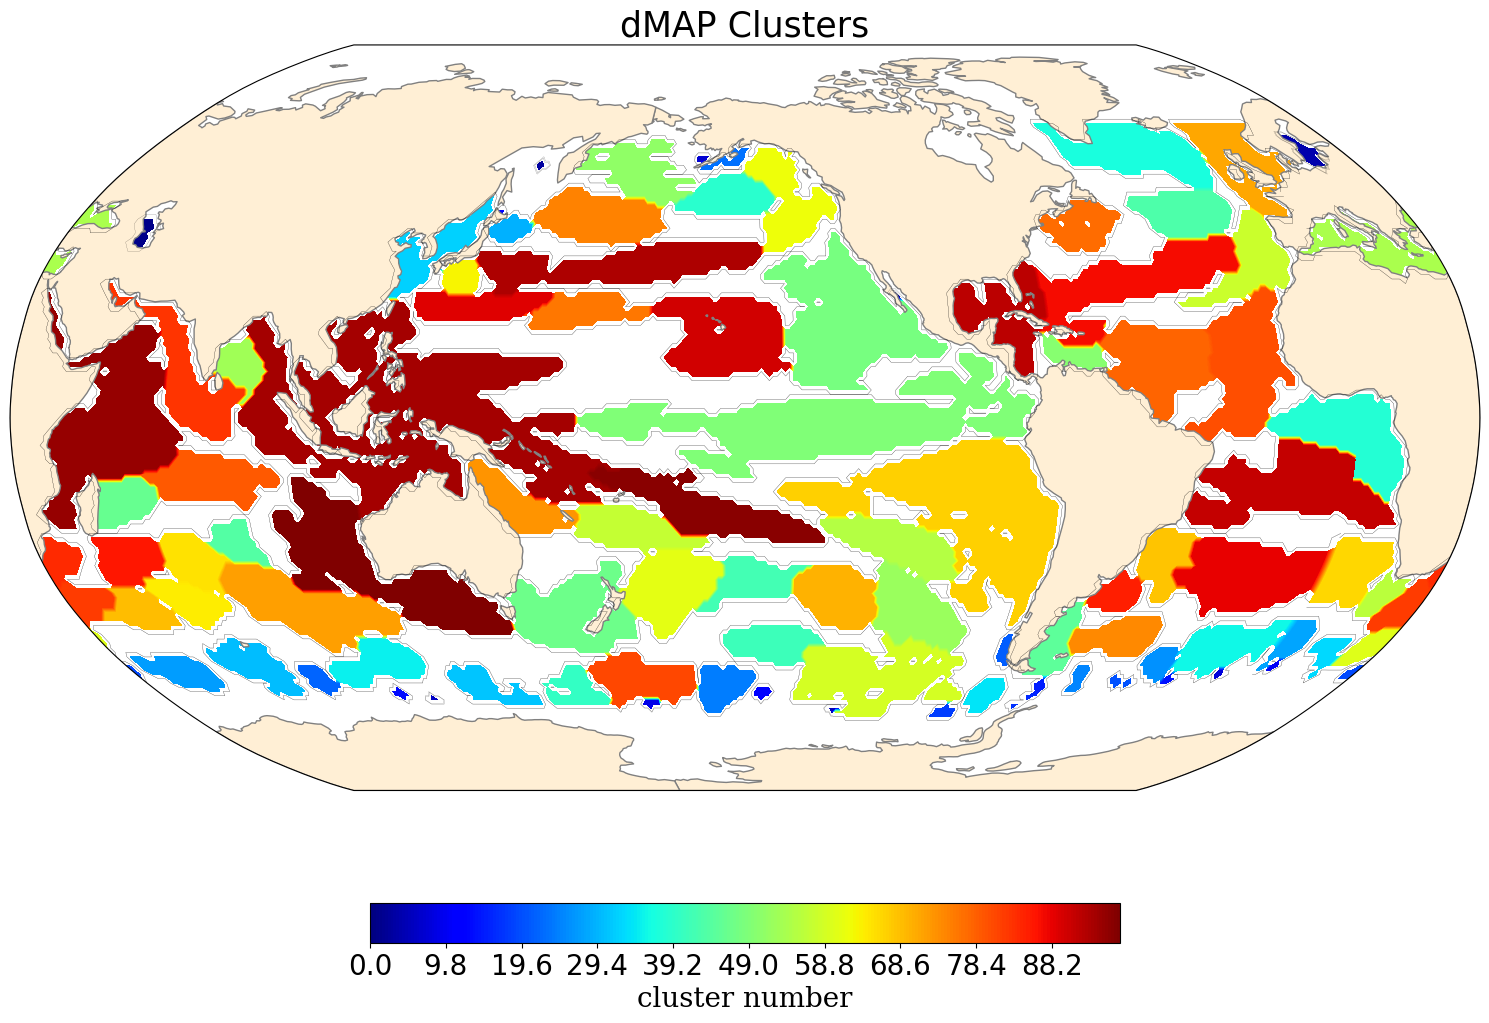

In [48]:

fig = plt.figure(figsize=fsize,dpi=100)
proj=ccrs.Robinson(central_longitude=lon0)
ax = plt.subplot(1,1,1, projection=proj
                     #Mercator()
                     )
ax.set_global()
##             min_lon,,max_lon,minlat,maxlat

lv=np.arange(cmin,cmax+interval,interval)

#mm=plt.contourf(lon,lat,data,levels=lv,
#          transform = ccrs.PlateCarree(),cmap=cmap)
Z = np.array(data)
Z[np.isnan(Z)]=0
plt.contour(lon,lat,Z,
            levels=np.arange(0,2),linewidths=1,
            colors='k',
           # levels=lv,linewidths=np.repeat(0.1,len(lv)),
           # corner_mask=True
            transform=ccrs.PlateCarree(),
           )
mm2=plt.contourf(lon,lat,data,levels=lv,
                 zorder=0,
              transform = ccrs.PlateCarree(),cmap='jet')

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='gray', facecolor=landcolor))
plt.title(title,fontsize=fontsize)

plt.tight_layout()

# # fig.subplots_adjust(aright=0.8)
cbar_ax2 = fig.add_axes([0.25, 0.1+offset_y, 0.5, 0.04])
# cbar_ax2 = fig.add_axes([1.025, 0.125, 0.025, 0.75])

# cbar_ax2 = fig.add_axes([0.85, 0.5, 0.025, 0.5])
cbar2=plt.colorbar(mm2,  cax=cbar_ax2,
                   orientation='horizontal')
cbar2.set_label(label=clabel,size=fontsize-5, family='serif')    
cbar2.ax.tick_params(labelsize=fontsize-5) 


plt.show()

In [44]:
np.nanmin(data)
Z = np.array(data)
Z[np.isnan(Z)]=0
# Z[Z>0] = 1

/Users/ccamargo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: No contour levels were found within the data range.
  


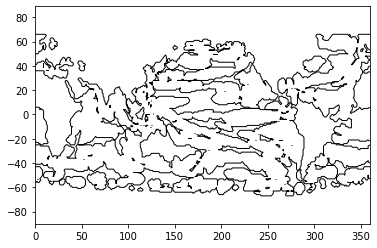

In [41]:
plt.figure()
plt.contour(lon,lat,Z,levels=np.arange(0,2),colors='k',linewidths=1,
           # corner_mask=True
           )
plt.show()

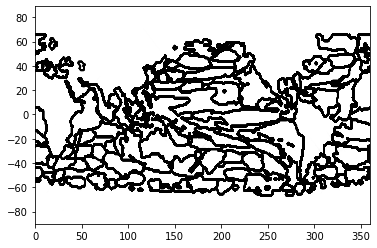

In [36]:
plt.figure()
plt.contour(lon,lat,Z,levels=lv,colors='k',linewidths=1,
            corner_mask=True
           )
plt.show()

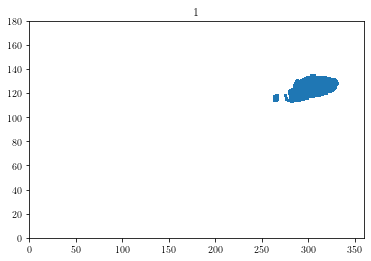

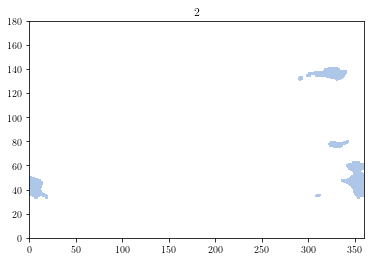

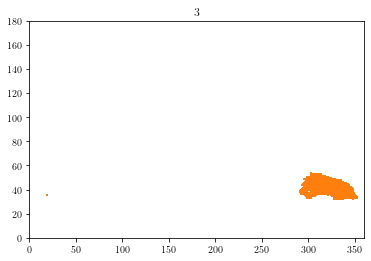

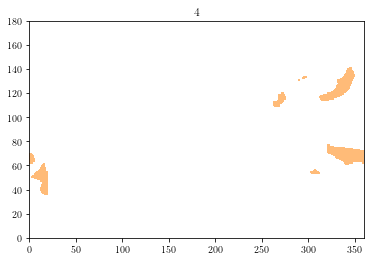

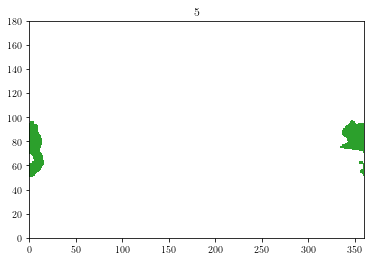

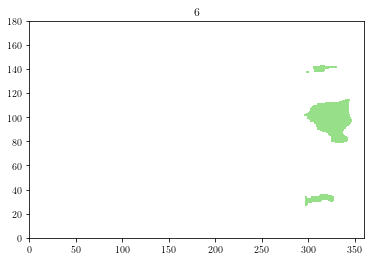

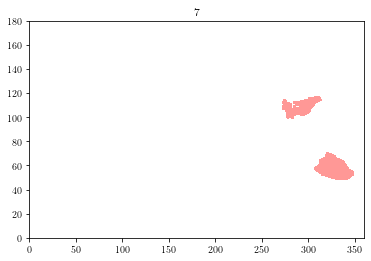

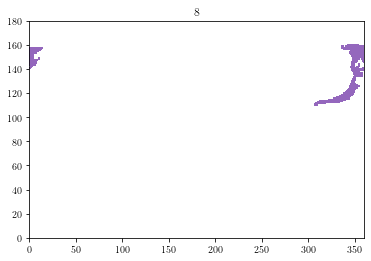

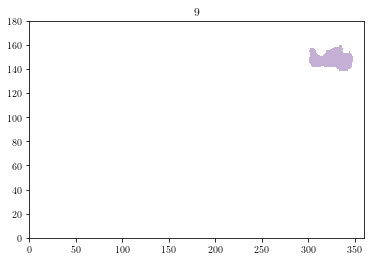

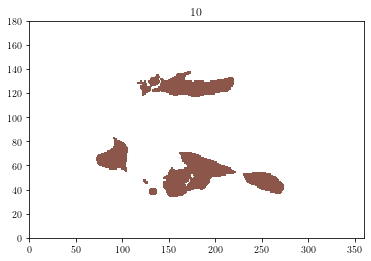

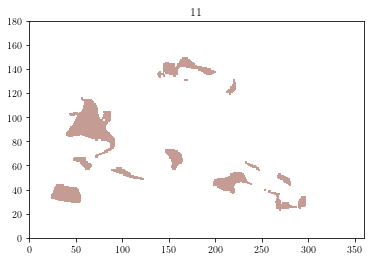

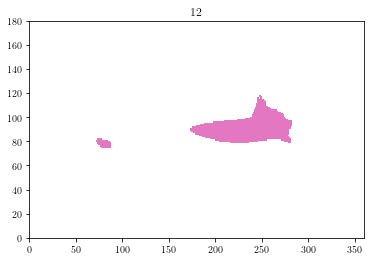

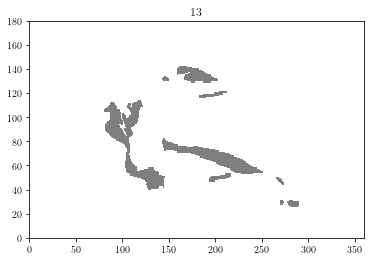

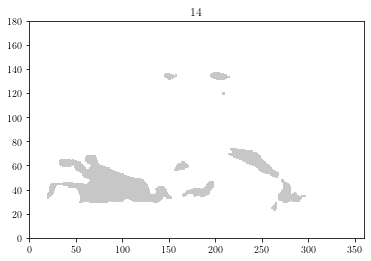

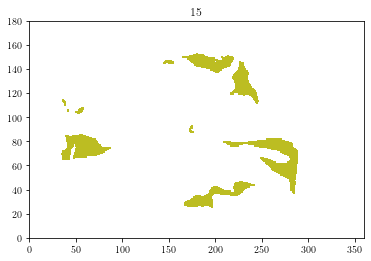

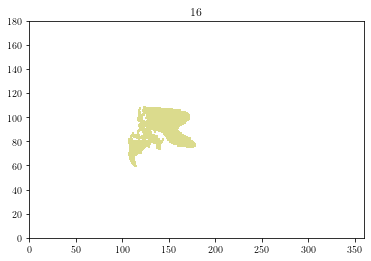

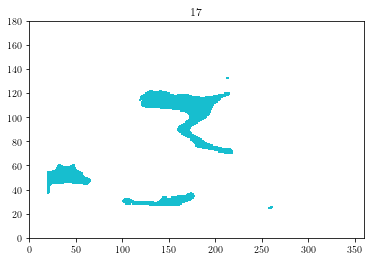

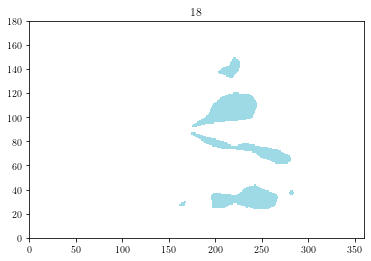

In [94]:
key='som'
mask_clusters = np.array(dic[key]['mask'])
n_clusters = dic[key]['n']
cmap = 'tab20'
cmap = plt.get_cmap(cmap, n_clusters)
data = np.array(mask_clusters)
title = 'SOM Clusters'    
clabel='cluster number'
cmin = 0 
cmax = 19
idata = 0
for i in range(n_clusters):
    msk= np.array(mask_clusters)
    msk[msk!=int(i+1)] = np.nan
    plt.pcolor(msk,vmin=cmin,vmax=cmax,cmap=cmap)
    plt.title(i+1)
    plt.show()
    
    

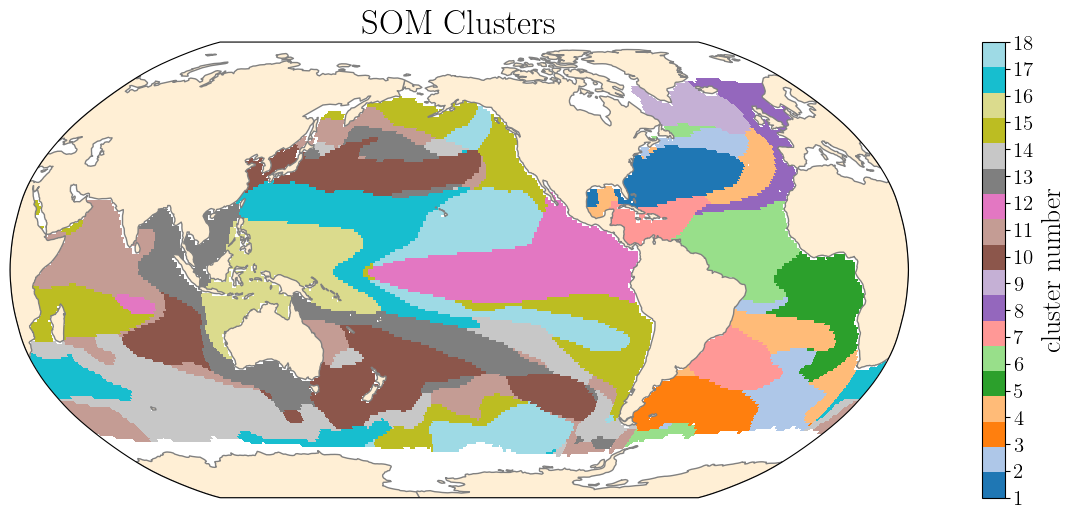

In [95]:
plot_type = 'pcolor'
nrow = 2
ncol= 1

fig = plt.figure(figsize=fsize,dpi=100)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
proj=ccrs.Robinson(central_longitude=lon0)

# SOM
key='som'
mask_clusters = np.array(dic[key]['mask'])
n_clusters = dic[key]['n']
cmap = 'tab20'
data = np.array(mask_clusters)
title = 'SOM Clusters'    
clabel='cluster number'
cmin = 0 
cmax = 19
idata = 0
cmap = plt.get_cmap(cmap, n_clusters)
ax = plt.subplot(nrow,ncol,idata+1, projection=proj
                     #Mercator()
                     )
ax.set_global()
##             min_lon,,max_lon,minlat,maxlat
if plot_type=='pcolor':
    mm = ax.pcolormesh(lon,\
                       lat,\
                       data,
                       vmin=cmin, vmax=cmax, 
                       transform=ccrs.PlateCarree(),
                       #cmap='Spectral_r'
                       cmap=cmap
                      )
if plot_type =='contour':
    lv=np.arange(cmin,cmax+interval,interval)
    mm=plt.contourf(lon,lat,data,levels=lv,
              transform = ccrs.PlateCarree(),cmap=cmap)

    plt.pcolormesh(lon,lat,data,
            vmin=cmin,vmax=cmax,
            zorder=0,
            transform = ccrs.PlateCarree(),cmap=cmap)

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='gray', facecolor=landcolor))
plt.title(title,fontsize=fontsize)
labels = np.arange(1,cmax,1)
loc    = labels + .5
loc = np.arange(1,19,2)+0.5
loc = np.linspace(0,20)
loc = np.linspace(0,cmax,len(labels))
cbar = plt.colorbar(mm,orientation='vertical')

cbar.set_label(label=clabel,size=fontsize-5, family='serif')    
cbar.ax.tick_params(labelsize=fontsize-10) 
cbar.set_ticks(loc)
cbar.set_ticklabels(labels)


plt.tight_layout()


plt.show()

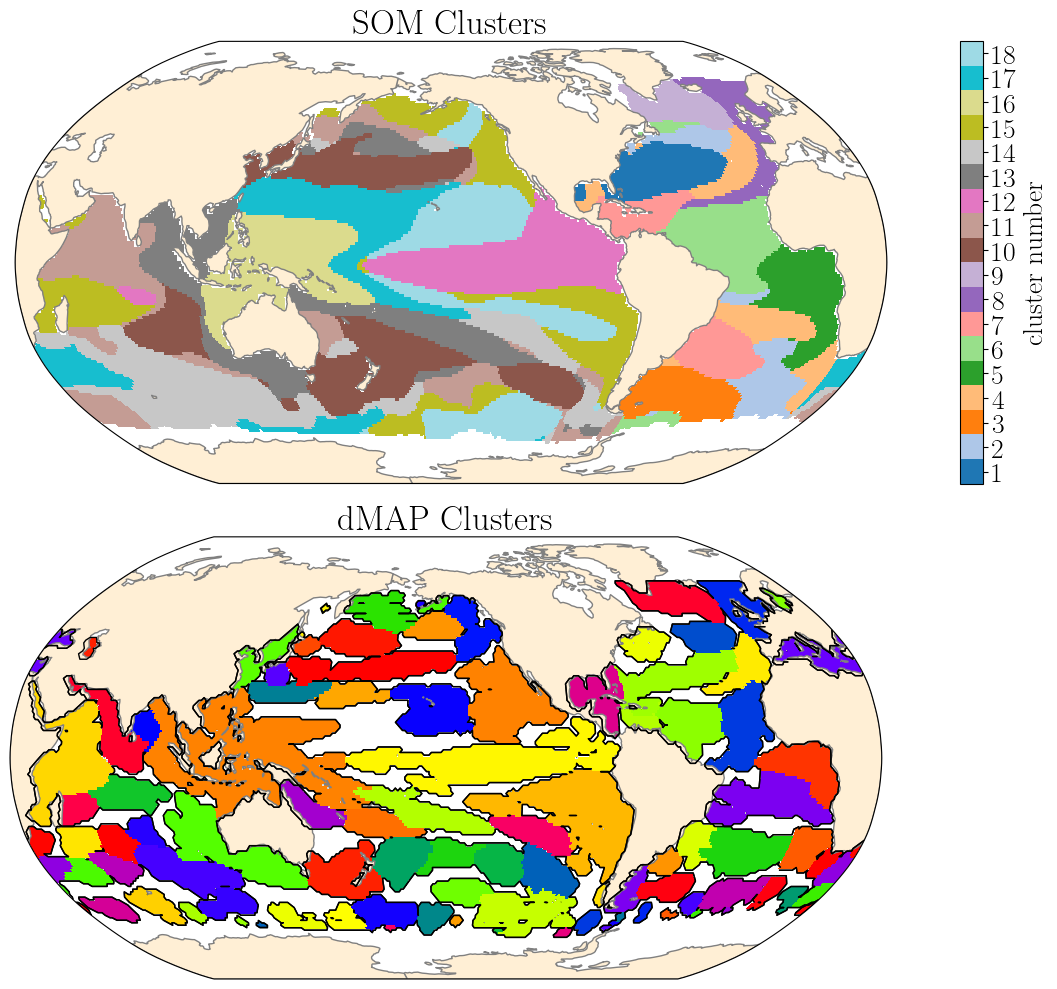

In [98]:
plot_type = 'pcolor'
nrow = 2
ncol= 1

fig = plt.figure(figsize=fsize,dpi=100)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
proj=ccrs.Robinson(central_longitude=lon0)

# SOM
key='som'
mask_clusters = np.array(dic[key]['mask'])
n_clusters = dic[key]['n']
cmap = 'tab20'
data = np.array(mask_clusters)
title = 'SOM Clusters'    
clabel='cluster number'
cmin = 0 
cmax = 19
idata = 0
cmap = plt.get_cmap(cmap, n_clusters)
ax = plt.subplot(nrow,ncol,idata+1, projection=proj
                     #Mercator()
                     )
ax.set_global()
##             min_lon,,max_lon,minlat,maxlat
if plot_type=='pcolor':
    mm = ax.pcolormesh(lon,\
                       lat,\
                       data,
                       vmin=cmin, vmax=cmax, 
                       transform=ccrs.PlateCarree(),
                       #cmap='Spectral_r'
                       cmap=cmap
                      )
if plot_type =='contour':
    lv=np.arange(cmin,cmax+interval,interval)
    mm=plt.contourf(lon,lat,data,levels=lv,
              transform = ccrs.PlateCarree(),cmap=cmap)

    plt.pcolormesh(lon,lat,data,
            vmin=cmin,vmax=cmax,
            zorder=0,
            transform = ccrs.PlateCarree(),cmap=cmap)

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='gray', facecolor=landcolor))
plt.title(title,fontsize=fontsize)
labels = np.arange(1,cmax,1)
loc    = labels + .5
loc = np.arange(1,19,2)+0.5
loc = np.linspace(0,20)
loc = np.linspace(0.5,18.5,len(labels))
cbar = plt.colorbar(mm,orientation='vertical')

cbar.set_label(label=clabel,size=fontsize-5, family='serif')    
cbar.ax.tick_params(labelsize=fontsize-5) 
cbar.set_ticks(loc)
cbar.set_ticklabels(labels)

# dmaps
key='dmap'
plot_type = 'contour'
mask_clusters = np.array(dic[key]['mask'])
n_clusters = dic[key]['n']
cmap='prism'
data = np.array(mask_clusters)
title = 'dMAP Clusters'    
clabel='cluster number'
cmin = 0 
cmax=n_clusters
idata = 1
ax = plt.subplot(nrow,ncol,idata+1, projection=proj
                     #Mercator()
                     )
ax.set_global()
Z = np.array(data)
Z[np.isnan(Z)]=0
plt.contour(lon,lat,Z,
            levels=np.arange(0,2),linewidths=1,
            colors='k',
           #  levels=lv,linewidths=np.repeat(0.1,len(lv)),
           # corner_mask=True
            transform=ccrs.PlateCarree(),
           )

# cmap = plt.get_cmap(cmap, len(np.unique(data[np.isfinite(data)])))


plt.pcolormesh(lon,lat,data,
            vmin=cmin,vmax=cmax,
            zorder=0,
            transform = ccrs.PlateCarree(),cmap=cmap)


ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='gray', facecolor=landcolor))
plt.title(title,fontsize=fontsize)

plt.tight_layout()


plt.show()

In [99]:
kurs=path_to_figures+'clusters.png'
        
fig.savefig(kurs,format='png',dpi=300,bbox_inches='tight')

# Figure 3 - Clusters Residuals

In [61]:
#%% make list with datasets
datasets = ['alt','sum','barystatic','sterodynamic',
            # 'sum','res'
           ]
titles = [r"$\eta_{sat(cor)}$",
          r"$\sum(\eta_{DSSL}+\eta_{BSL})$", 
          
          r"$\eta_{BSL}$",
          r"$\eta_{SDSL}$",
         ]
# \eta_{obs} = \eta_{SSL} = \eta_{BSL} + \eta_{DSL} 
# plt.title(r"$\eta$")
das_unc = []
das_trend = []
das_ts = []
for key in datasets:
    if key =='sterodynamic':
        das_unc.append(dic['steric']['unc'] + dic['dynamic']['unc'])
        das_trend.append(dic['steric']['trend'] + dic['dynamic']['trend'])
        das_ts.append(dic['steric']['ts'] + dic['dynamic']['ts'])
    else:
        das_unc.append(dic[key]['unc']*landmask)
        das_trend.append(dic[key]['trend']*landmask)
        das_ts.append(dic[key]['ts'])
    

NameError: name 'landmask' is not defined